In [1]:
plt.style.use('ncr-paper.mplstyle')

In [2]:
import sys
sys.path.insert(0,'../../../')

In [3]:
from pyathena.tigress_ncr.ncr_paper_lowz import LowZData

[stellar-vis1.princeton.edu:2276479] mca_base_component_repository_open: unable to open mca_op_avx: /usr/local/openmpi/4.1.0/gcc/lib64/openmpi/mca_op_avx.so: undefined symbol: ompi_op_base_module_t_class (ignored)


In [4]:
pdata = LowZData()

LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rs

R8-S30 R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps0.0
R8-S30 R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
LGR8-S05 LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg1.Zd1.xy4096.eps0.0
LGR8-S05 LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg0.1.Zd0.1.xy8192.eps0.0
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8.rstZ01
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8
LGR4-b10 LGR4_4pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy10

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_pdf(pdf,logTc=3,logTw=3.5):
    fig,axes = plt.subplots(2,2,figsize=(8,6),sharex='col',sharey='row',
                            # layout='constrained',
                            gridspec_kw=dict(width_ratios=[1,0.5],height_ratios=[0.5,1]))

    axes[0,1].axis('off')

    plt.sca(axes[1,0])
    im = plt.pcolormesh(pdf.T_bin,pdf.xHI_bin,pdf.mean(dim='time'),norm=LogNorm(1.e-28,1.e-18))
    cbar = plt.colorbar(im,ax = axes[1,0], shrink=0.5,pad=-0.2)

    plt.xlim(1,5)
    plt.axhline(0.1,ls='--',color='r')
    plt.axhline(0.9,ls='--',color='r')
    plt.axvline(logTc,ls='--',color='b')
    plt.axvline(logTw,ls='--',color='b')
    plt.xlabel(r'$\log T$')
    plt.ylabel(r'$x_{HI}$')

    plt.sca(axes[0,0])
    plot_pdf_xHI(pdf)
    plt.legend(fontsize='xx-small',loc=2,bbox_to_anchor=(1,1))
    # plt.xlabel(r'$\log T$')
    plt.xlabel('')
    plt.ylabel(r'$d 4\pi j_{[CII]}/d\log T$')

    plt.sca(axes[1,1])
    plot_pdf_T(pdf,logTc=3,logTw=3.5)
    # plt.ylabel(r'$x_{HI}$')
    plt.xlabel(r'$d 4\pi j_{[CII]}/d x_{H}$')
    plt.legend(fontsize='xx-small',loc=4,bbox_to_anchor=(1,1))

def plot_pdf_xHI(pdf):
    dx = (pdf.xHI_bin[1]-pdf.xHI_bin[0]).data
    dy = (pdf.T_bin[1]-pdf.T_bin[0]).data
    (pdf.sum(dim='xHI_bin')*dx).mean(dim='time').plot(color='k',label='total',lw=5,alpha=0.5)
    (pdf.sel(xHI_bin=slice(0,0.1)).sum(dim='xHI_bin')*dx).mean(dim='time').plot(label=r'ionized (xHI<0.1)')
    (pdf.sel(xHI_bin=slice(0.1,0.9)).sum(dim='xHI_bin')*dx).mean(dim='time').plot(label=r'0.1<xHI<0.9')
    (pdf.sel(xHI_bin=slice(0.9,1)).sum(dim='xHI_bin')*dx).mean(dim='time').plot(label=r'atomic (xHI>0.9)')

    plt.yscale('log')
    plt.xlim(1,5)
    plt.ylim(1.e-28,1.e-18)

def plot_pdf_T(pdf, logTc=3, logTw=3.5):
    dx = (pdf.xHI_bin[1]-pdf.xHI_bin[0]).data
    dy = (pdf.T_bin[1]-pdf.T_bin[0]).data
    x = pdf.xHI_bin
    y = (pdf.sum(dim='T_bin')*dy).mean(dim='time')
    plt.plot(y,x,color='k',label='total',lw=5,alpha=0.5)
    y = (pdf.sel(T_bin=slice(0,logTc)).sum(dim='T_bin')*dy).mean(dim='time')
    plt.plot(y,x,label=f'Cold (log T<{logTc})')
    y = (pdf.sel(T_bin=slice(logTc,logTw)).sum(dim='T_bin')*dy).mean(dim='time')
    plt.plot(y,x,label=f'{logTc}<log T<{logTw}')
    y = (pdf.sel(T_bin=slice(logTw,5)).sum(dim='T_bin')*dy).mean(dim='time')
    plt.plot(y,x,label=f'Warm (log T>{logTw})')

    plt.xscale('log')
    plt.ylim(0,1)
    plt.xlim(1.e-28,1.e-18)

In [6]:
def get_phase_separated_CII(pdf, logTc=3, logTw=3.5):
    LCII = xr.Dataset()
    dx = (pdf.xHI_bin[1]-pdf.xHI_bin[0]).data
    dy = (pdf.T_bin[1]-pdf.T_bin[0]).data
    # LCII['total'] = pdf.sum(dim=['xHI_bin','T_bin'])*dx*dy
    LCII['WIM'] = pdf.sel(xHI_bin=slice(0,0.1),T_bin=slice(logTc,5)).sum(dim=['xHI_bin','T_bin'])*dx*dy
    LCII['WpIM'] = pdf.sel(xHI_bin=slice(0.1,0.9),T_bin=slice(logTc,5)).sum(dim=['xHI_bin','T_bin'])*dx*dy
    LCII['WNM'] = pdf.sel(xHI_bin=slice(0.9,1.0),T_bin=slice(logTw,5)).sum(dim=['xHI_bin','T_bin'])*dx*dy
    LCII['UNM'] = pdf.sel(xHI_bin=slice(0.9,1.0),T_bin=slice(logTc,logTw)).sum(dim=['xHI_bin','T_bin'])*dx*dy
    LCII['CNM'] = pdf.sel(xHI_bin=slice(0.5,1.0),T_bin=slice(0,logTc)).sum(dim=['xHI_bin','T_bin'])*dx*dy
    LCII['CMM'] = pdf.sel(xHI_bin=slice(0,0.5),T_bin=slice(0,logTc)).sum(dim=['xHI_bin','T_bin'])*dx*dy

    return LCII.to_array('phase')

In [7]:
for m in pdata.mlist:
    print(m)
    s = pdata.sa.set_model(m)
    dirname = glob.glob(os.path.join(s.savdir,'jointpdf_*'))
    if len(dirname)>0:
        outdir = dirname[0]
        fname = os.path.join(outdir,'LCII.nc')
        if os.path.isfile(fname): continue
        pdf = s.get_merge_jointpdfs(xHI=True)['CII']
        LCII = get_phase_separated_CII(pdf)
        LCII.to_netcdf(fname)

R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps0.0
R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps0.0
R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg1.Zd1.xy4096.eps0.0
LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg0.1.Zd0.1.xy8192.eps0.0
LGR4_4pc_NCR_S100.full.b1.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8.rstZ01
LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8
LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8
LGR4_4pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8
LGR4_4pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8
LGR4_4pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8


In [117]:
for m in pdata.mlist:
    s = pdata.sa.set_model(m)
    dirname = glob.glob(os.path.join(s.savdir,'jointpdf_*'))
    if len(dirname)>0:
        torb = s.torb_Myr/s.u.Myr
        if s.torb_Myr <50:
            trange = slice(torb*5,torb*15)
        elif s.torb_Myr >300:
            trange = slice(torb*1.5,torb*5)
        else:
            trange = slice(torb*2,torb*5)
        pdf = s.get_merge_jointpdfs(xHI=True)
        plot_pdf(pdf['CII'].sel(time=trange))
        # outdir, = glob.glob(os.path.join(s.savdir,'jointpdf_*'))
        fname = os.path.join('./pdf_figures',f'{s.basename}.jCII_pdf.png')
        plt.savefig(fname)
        plt.close()

/tmp/ipykernel_1223970/3839168577.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = plt.pcolormesh(pdf.T_bin,pdf.xHI_bin,pdf.mean(dim='time'),norm=LogNorm(1.e-28,1.e-18))
/tmp/ipykernel_1223970/3839168577.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = plt.pcolormesh(pdf.T_bin,pdf.xHI_bin,pdf.mean(dim='time'),norm=LogNorm(1.e-28,1.e-18))
/tmp/ipykernel_1223970/3839168577.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = plt.pcolormesh(pdf.T_bin,pdf.xHI_bin,pdf.mean(dim='time'),norm=LogNorm(1.e-28,1.e-18))
/tmp/ipykernel_1223970/3839168577.py:11: Matplotl

In [46]:
def get_pdf_sum(s,trange,bf='T-xHI',wf='nH'):
    pdf_sum = []
    for num in s.nums_starpar:
        try:
            pdf2d = s.read_pdf2d(num)
        except OSError:
            print(f'no pdf file for {s.basename} -- {num}')
            continue
        pdf_ = pdf2d[bf][wf]

        xe = pdf2d[bf]['xe']
        ye = pdf2d[bf]['ye']

        xbin = np.log10(xe)
        xc = 0.5*(xbin[1:]+xbin[:-1])
        yc = 0.5*(ye[1:]+ye[:-1])
        dx = xc[1]-xc[0]
        dy = yc[1]-yc[0]

        pdf_ = xr.DataArray((pdf_/pdf_.sum()/dx/dy).T,coords=[yc,xc],dims=['xHI_bin','T_bin'])
        pdf_sum.append(pdf_.assign_coords(time=pdf2d['time_code']))

    return xr.concat(pdf_sum,dim='time')

In [49]:
for m in pdata.mlist:
    print(m)
    s = pdata.sa.set_model(m)
    dirname = glob.glob(os.path.join(s.savdir,'jointpdf_*'))
    if len(dirname)>0:
        torb = s.torb_Myr/s.u.Myr
        if s.torb_Myr <50:
            trange = slice(torb*5,torb*15)
        elif s.torb_Myr >300:
            trange = slice(torb*1.5,torb*5)
        else:
            trange = slice(torb*2,torb*5)
        outdir = dirname[0]
        fname = os.path.join(outdir,'fmass.nc')
        # if os.path.isfile(fname): continue
        pdf_ = get_pdf_sum(s,trange,wf='nH')
        fmass = get_phase_separated_CII(pdf_)
        fmass.to_netcdf(fname)



R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps0.0


R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps0.0
R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg1.Zd1.xy4096.eps0.0
LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg0.1.Zd0.1.xy8192.eps0.0
LGR4_4pc_NCR_S100.full.b1.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8.rstZ01
LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8
LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8
LGR4_4pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8
LGR4_4pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8
LGR4_4pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8
LGR4_4pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy2048.eps1.

In [11]:
with xr.open_dataarray('percentiles_all.nc') as qdset:
    W = qdset.sel(q='mean').sel(variable='W')

In [17]:
qmean = qdset.sel(q='mean').to_dataset('variable').squeeze()

<xarray.Dataset>
Dimensions:               (name: 26)
Coordinates:
  * name                  (name) object 'R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Z...
    q                     <U4 'mean'
Data variables: (12/97)
    Ptot                  (name) float64 ...
    Ytot                  (name) float64 ...
    Ptot_top              (name) float64 ...
    dPtot                 (name) float64 ...
    Pturb                 (name) float64 ...
    Yturb                 (name) float64 ...
    ...                    ...
    tdep10                (name) float64 ...
    tdep40                (name) float64 ...
    tdep100               (name) float64 ...
    Zgas                  (name) float64 ...
    Zdust                 (name) float64 ...
    PDE                   (name) float64 ...

In [87]:
def get_color(Zdust,cmap=cmr.guppy,Zmin=-1.3,Zmax=0.3):
    norm = Normalize(vmin=Zmin, vmax=Zmax)
    c = cmap(norm(np.log10(Zdust)))
    return c
def get_kwargs(name,cmap=cmr.guppy,Zmin=-1.3,Zmax=0.3):
    if 'Zd0.025' in name:
        marker='s'
    elif 'Om01' in name:
        marker='v'
    elif 'Om02' in name:
        marker='^'
    elif 'b10' in name and not 'S05' in name:
        marker='*'
    else:
        marker='o'
    if 'Zd0.025' in name:
        Zdust = 0.025
    elif 'Zd0.1' in name:
        Zdust = 0.1
    elif 'Zd0.3' in name:
        Zdust = 0.3
    elif 'Zd1' in name:
        Zdust = 1
    c = get_color(Zdust)
    return dict(marker=marker,color=c)

In [37]:
data = xr.Dataset()
for m in qmean.name.data:
    s = pdata.sa.set_model(m)
    outdir, = glob.glob(os.path.join(s.savdir,'jointpdf_*'))
    fname = os.path.join(outdir,'LCII.nc')
    # if os.path.isfile(fname):
    #     print(fname)
    # else:
    #     return
    # with xr.open_dataarray('percentiles_all.nc') as qdset:
    #     W = qdset.sel(q='mean').sel(variable='W')
    torb = s.torb_Myr/s.u.Myr
    if s.torb_Myr <50:
        trange = slice(torb*5,torb*15)
    elif s.torb_Myr >300:
        trange = slice(torb*1.5,torb*5)
    else:
        trange = slice(torb*2,torb*5)
    with xr.open_dataarray(fname) as da:
        dsel = da.sel(time=trange)
    data[m] = dsel.mean(dim='time')
CII=data.to_array('name')

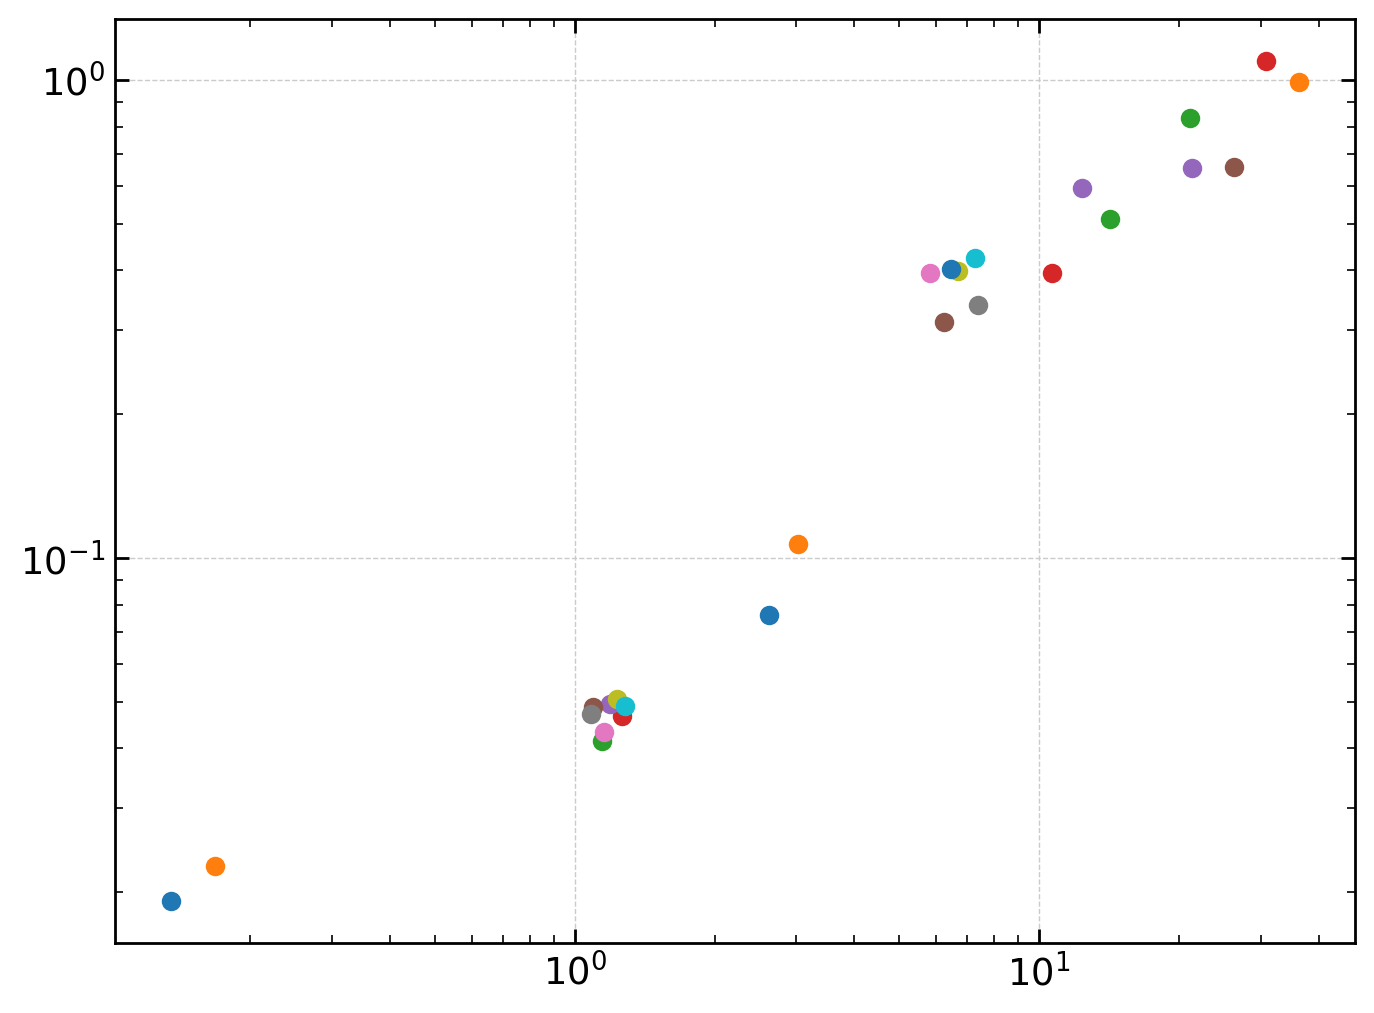

In [63]:
for m in qmean.name.data:
    s = pdata.sa.set_model(m)
    area = s.domain['Lx'][0]*s.domain['Lx'][1]
    Lz = s.domain['Lx'][2]
    navg = qmean.sel(name=m)['Sigma_gas']/s.u.Msun/Lz#*area
    plt.plot(qmean.sel(name=m)['nH'].data,navg.data,'o')
plt.xscale('log')
plt.yscale('log')

In [70]:
s.u.density

<Quantity 2.34335273e-24 g / cm3>

In [71]:
NH = qmean['Sigma_gas'].sel(name=m)/s.u.density.value

In [72]:
NH

<xarray.DataArray 'Sigma_gas' ()>
array(9.0476439e-11)
Coordinates:
    name     <U65 'LGR2_4pc_NCR_S150.full.b2.Om01.q0.v3.iCR5.Zg1.Zd1.xy1024.e...
    q        <U4 'mean'

AttributeError: 'LoadSimTIGRESSNCR' object has no attribute 'ac'

In [77]:
from pyathena.microphysics.cool import q10CII_

In [93]:
def Lambda_CII_HC17(nH,T,xC=1.5e-4,xHI=1.0,xH2=0.0):
    Aul = 2.3e-6
    T0 = 91.2
    xe = (1-xHI-2*xH2)+xC
    q10 = q10CII_(nH, T, xe, xHI, xH2)
    boltz_factor=2*np.exp(-T0/T)
    return 2.9e-20*xC*boltz_factor/(1+boltz_factor+Aul/q10)

In [94]:
s.par['cooling']['xCstd']

0.00016

(1e-28, 1e-24)

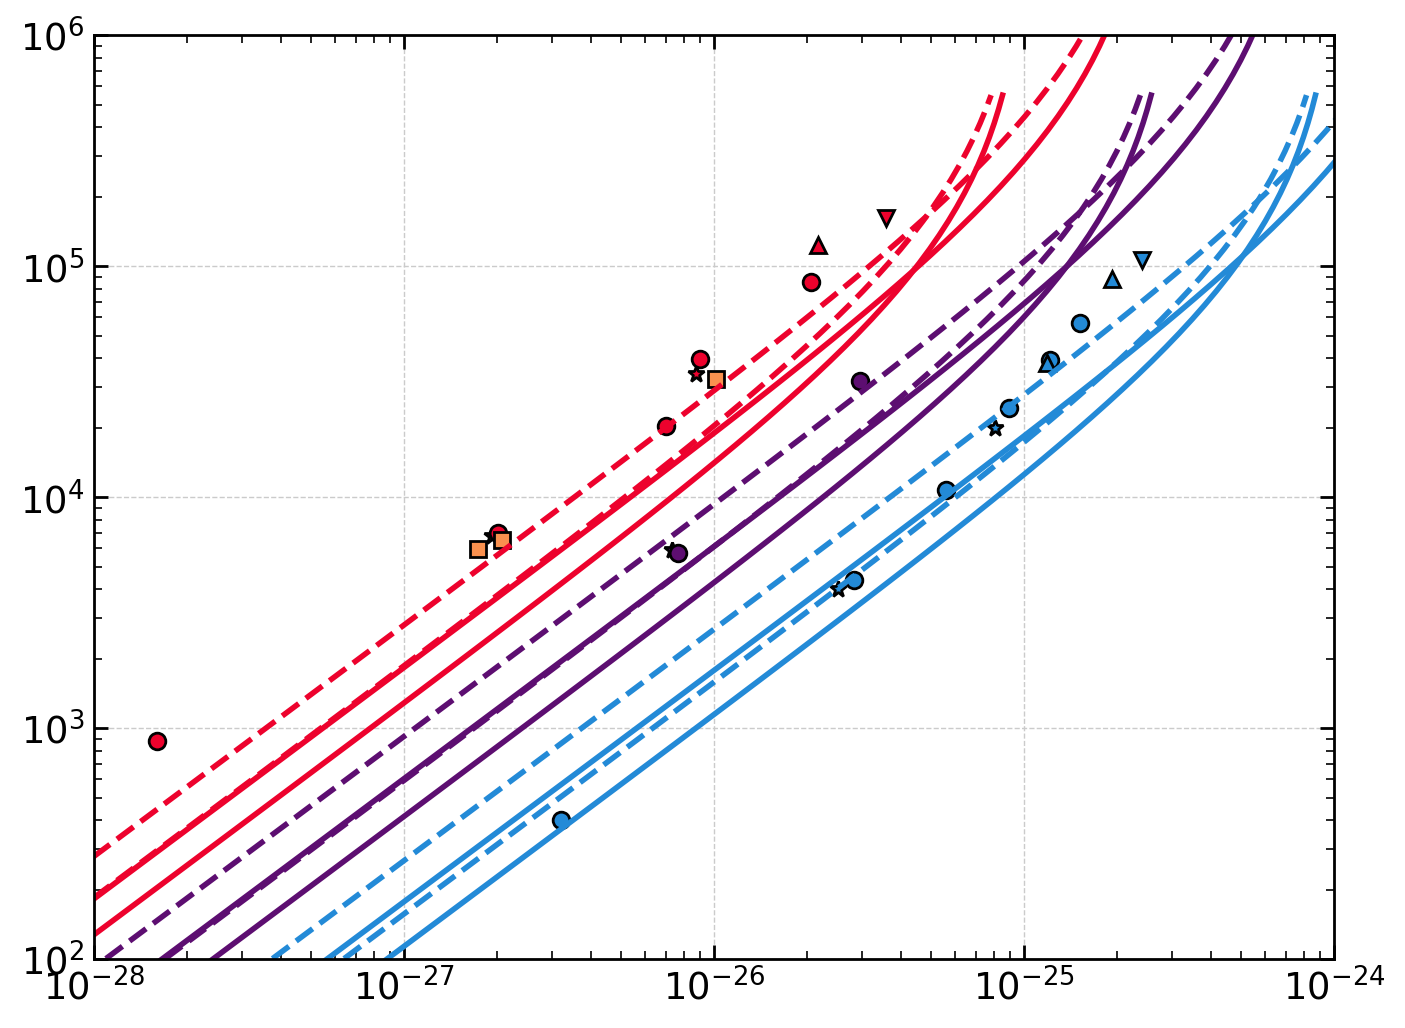

In [96]:
for m in qmean.name.data:
    kwargs = get_kwargs(m)
    s = pdata.sa.set_model(m)
    area = s.domain['Lx'][0]*s.domain['Lx'][1]
    mass = qmean['Sigma_gas'].sel(name=m)*area*(ac.M_sun/s.u.muH/s.u.mH).cgs
    dvol = np.prod(s.domain['dx']*s.u.cm)
    LCII = CII.sel(name=m).sum(dim='phase')*dvol
    plt.plot(LCII/mass,
             qmean['Pth'].sel(name=m),
             mec='k',mew=1,**kwargs)
nH = np.logspace(-2,4,100)
for Z in [0.1,0.3,1]:
    for T_ in [50,500]:
        c = get_color(Z)
        plt.plot(Lambda_CII_HC17(nH,T_,xC=1.5e-4*Z,xHI=1.0),1.1*nH*T_,color=c)
        plt.plot(Lambda_CII_HC17(nH,T_,xC=1.5e-4*Z,xHI=0.5,xH2=0.25),1.1*nH*T_,color=c,ls='--')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e2,1.e6)
plt.xlim(1.e-28,1.e-24)

(1e-28, 1e-24)

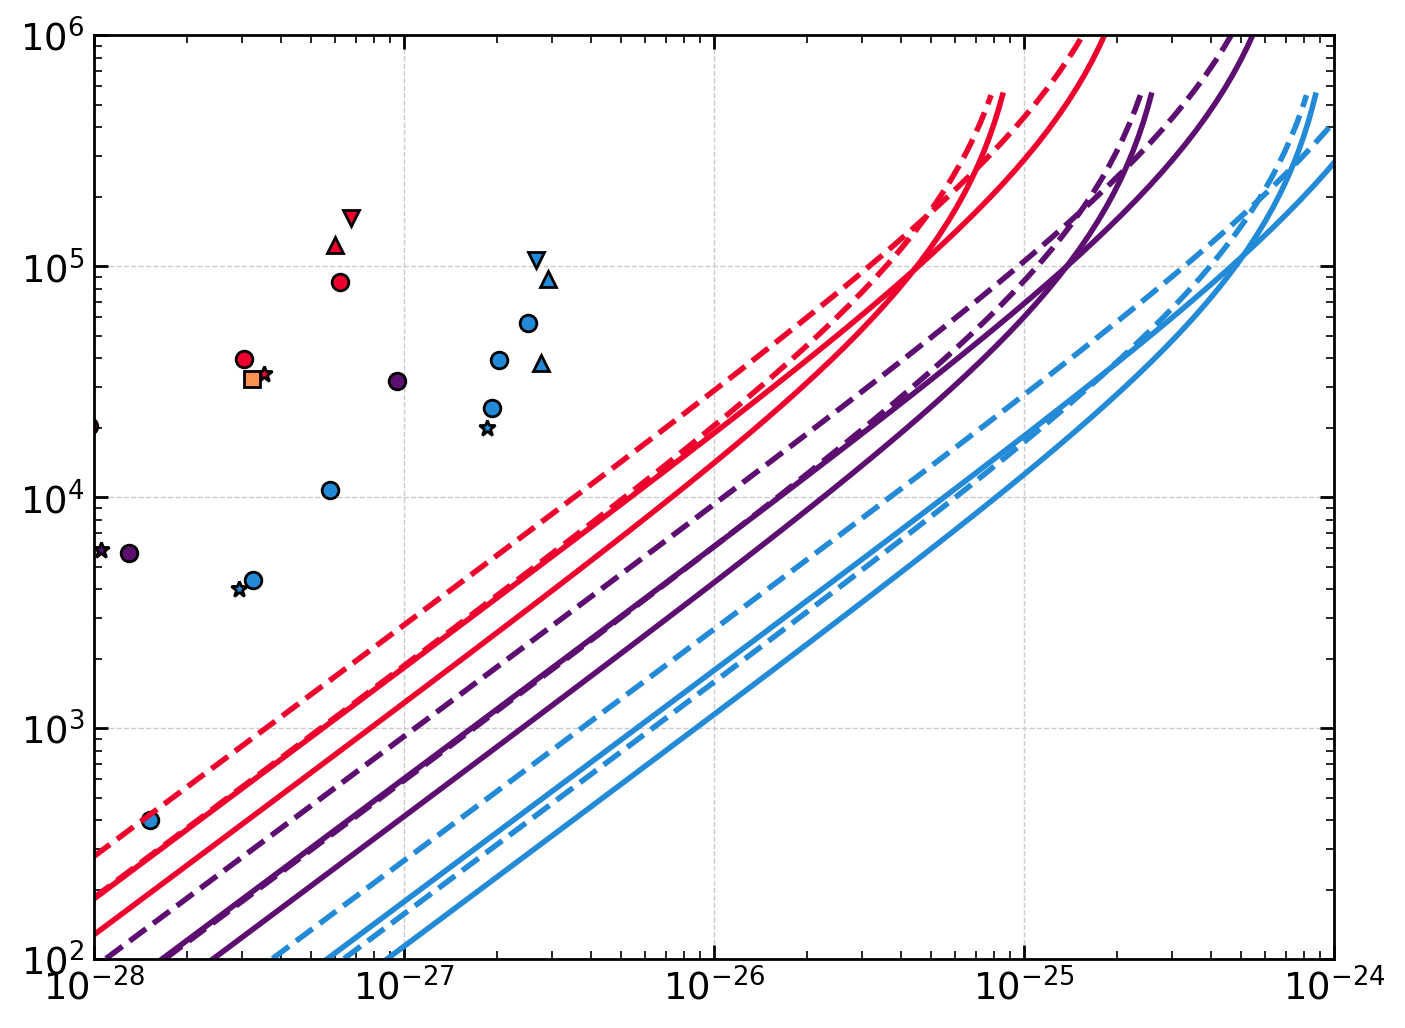

In [99]:
for m in qmean.name.data:
    kwargs = get_kwargs(m)
    s = pdata.sa.set_model(m)
    Ncells = np.prod(s.domain['Nx'])
    area = s.domain['Lx'][0]*s.domain['Lx'][1]
    mass = qmean['Sigma_gas'].sel(name=m)*area*(ac.M_sun/s.u.muH/s.u.mH).cgs
    dvol = np.prod(s.domain['dx']*s.u.cm)
    jCII = CII.sel(name=m,phase=['CNM','UNM','WNM']).sum(dim='phase')/Ncells
    nH = qmean['nH'].sel(name=m)
    plt.plot(jCII/nH,
             qmean['Pth'].sel(name=m),
             mec='k',mew=1,**kwargs)
nH = np.logspace(-2,4,100)
for Z in [0.1,0.3,1]:
    for T_ in [50,500]:
        c = get_color(Z)
        plt.plot(Lambda_CII_HC17(nH,T_,xC=1.5e-4*Z,xHI=1.0),1.1*nH*T_,color=c)
        plt.plot(Lambda_CII_HC17(nH,T_,xC=1.5e-4*Z,xHI=0.5,xH2=0.25),1.1*nH*T_,color=c,ls='--')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e2,1.e6)
plt.xlim(1.e-28,1.e-24)

In [36]:
def get_point(pdata,m,xf='W',**kwargs):
    s = pdata.sa.set_model(m)
    outdir, = glob.glob(os.path.join(s.savdir,'jointpdf_*'))
    fname = os.path.join(outdir,'LCII.nc')
    if os.path.isfile(fname):
        print(fname)
    else:
        return
    # with xr.open_dataarray('percentiles_all.nc') as qdset:
    #     W = qdset.sel(q='mean').sel(variable='W')
    torb = s.torb_Myr/s.u.Myr
    if s.torb_Myr <50:
        trange = slice(torb*5,torb*15)
    elif s.torb_Myr >300:
        trange = slice(torb*1.5,torb*5)
    else:
        trange = slice(torb*2,torb*5)
    with xr.open_dataarray(fname) as da:
        dsel = da.sel(time=trange)
    # LCII_tot = a.sum(dim='phase')
    dvol = np.prod(s.domain['dx']*s.u.cm)
    area = s.domain['Lx'][0]*s.domain['Lx'][1]*s.u.cm**2
    SCII = dsel*dvol/area
    to_column = (ac.M_sun/ac.pc**2/(1.4*ac.m_p)).cgs
    NH = qdset.sel(q='mean').sel(variable='Sigma_gas').sel(name=m)*to_column.value
    return qdset.sel(q='mean').sel(variable=xf).sel(name=m), dsel, SCII, NH

In [ ]:
_, jCII, SCII, NH = get_point(pdata,pdata.mlist[-3])
plist=list(jCII.phase.data)

In [ ]:
data = dict()
for ph in plist+['total']:
    data[ph]=[]
Wdata =[]
for m in pdata.mlist[:-2]:
    W_, jCII, SCII, NH = get_point(pdata,m,xf='Pth')
    Wdata.append(W_)
    for ph in plist:
        # data[ph].append((CII.sel(phase=ph)/CII.sum(dim='phase')).mean(dim='time').data)
        # data[ph].append((CII.sel(phase=ph)).mean(dim='time').data)
        data[ph].append((SCII.sel(phase=ph)/NH).mean(dim='time').data)
    data['total'].append((SCII.sum(dim='phase')/NH).mean(dim='time').data)

for ph in plist+['total']:
    data[ph]=np.array(data[ph])
Wdata = np.array(Wdata)

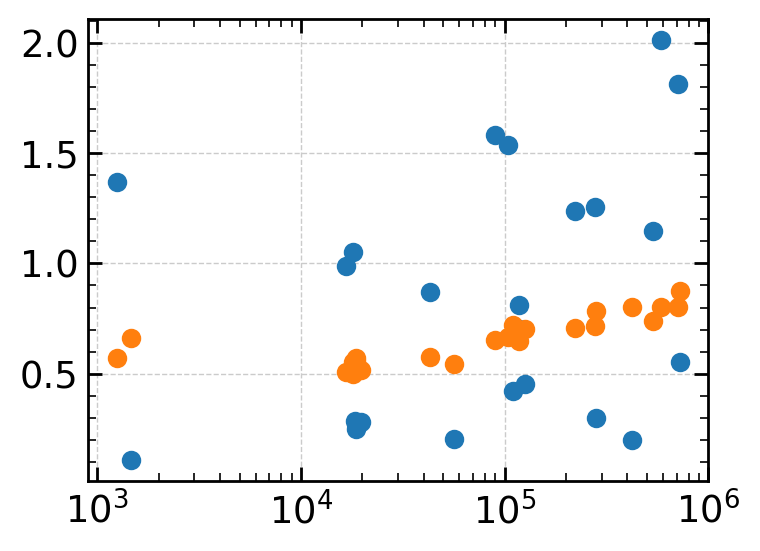

In [82]:
plt.figure(figsize=(4,3))
plt.plot(W,data['CNM']/data['WNM'],marker='o',ls='')
plt.plot(W,(data['CNM']+data['UNM']+data['WNM']+data['WpIM'])/data['total'],marker='o',ls='')
plt.xscale('log')
# plt.yscale('log')

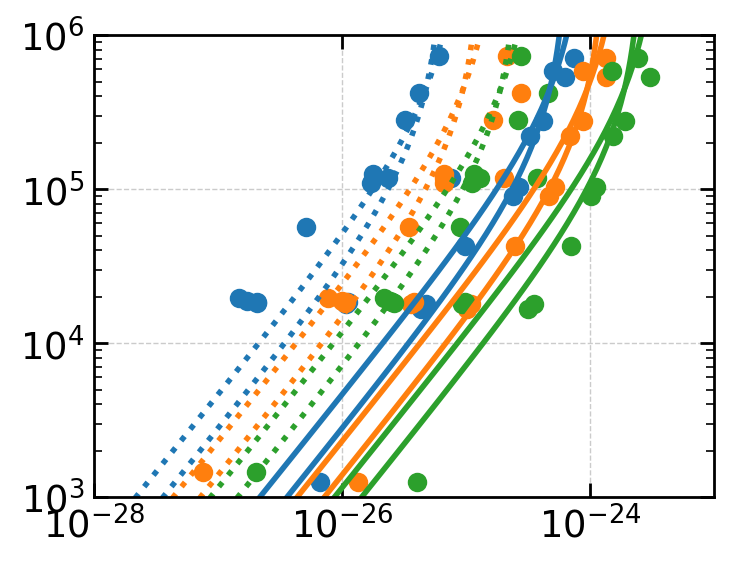

In [80]:
plt.figure(figsize=(4,3))
plt.plot(data['CNM'],W,marker='o',ls='')
plt.plot(data['CNM']+data['UNM']+data['WNM'],W,marker='o',ls='')
plt.plot(data['total'],W,marker='o',ls='')
# plt.plot(data['WNM'],W,marker='o',ls='')
# plt.plot(data['WIM'],W,marker='o',ls='')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-28,1.e-23)
plt.ylim(1.e3,1.e6)

# HC17 prediction
nH = np.logspace(-2,5,100)
for T_ in [100, 400]:
    # plt.plot(Lambda_CII_HC17(nH,T_,fcnm=0.5,fdiff=0.0,xC=get_xC(logOH=8.65)),1.1*nH*T_)
    # plt.plot(Lambda_CII_HC17(nH,T_,fcnm=0.1,fion=0.9,fdiff=0.0,xC=get_xC(logOH=7.65)),1.1*nH*T_,ls=':')
    plt.plot(Lambda_CII_HC17(nH,T_,A=1.e-20,xC=1.5e-4),1.1*nH*T_,color='C0')
    plt.plot(Lambda_CII_HC17(nH,T_,A=1.e-20,xC=1.5e-5),1.1*nH*T_,ls=':',color='C0')
    plt.plot(Lambda_CII_HC17(nH,T_,A=2.e-20,xC=1.5e-4),1.1*nH*T_,color='C1')
    plt.plot(Lambda_CII_HC17(nH,T_,A=2.e-20,xC=1.5e-5),1.1*nH*T_,ls=':',color='C1')
    plt.plot(Lambda_CII_HC17(nH,T_,A=4.e-20,xC=1.5e-4),1.1*nH*T_,color='C2')
    plt.plot(Lambda_CII_HC17(nH,T_,A=4.e-20,xC=1.5e-5),1.1*nH*T_,ls=':',color='C2')

In [52]:
def get_xC(logOH = 8.65):
    logOH = logOH - 12
    logCH = logOH + np.log10(0.1+10**(2.72+logOH))
    xC = 10**logCH
    return xC

In [53]:
for logOH in [8,8.3,8.65,8.9]:
    print(get_xC(logOH))

1.5248074602497742e-05
4.084558445822933e-05
0.00014938121402018645
0.0004105639449550202


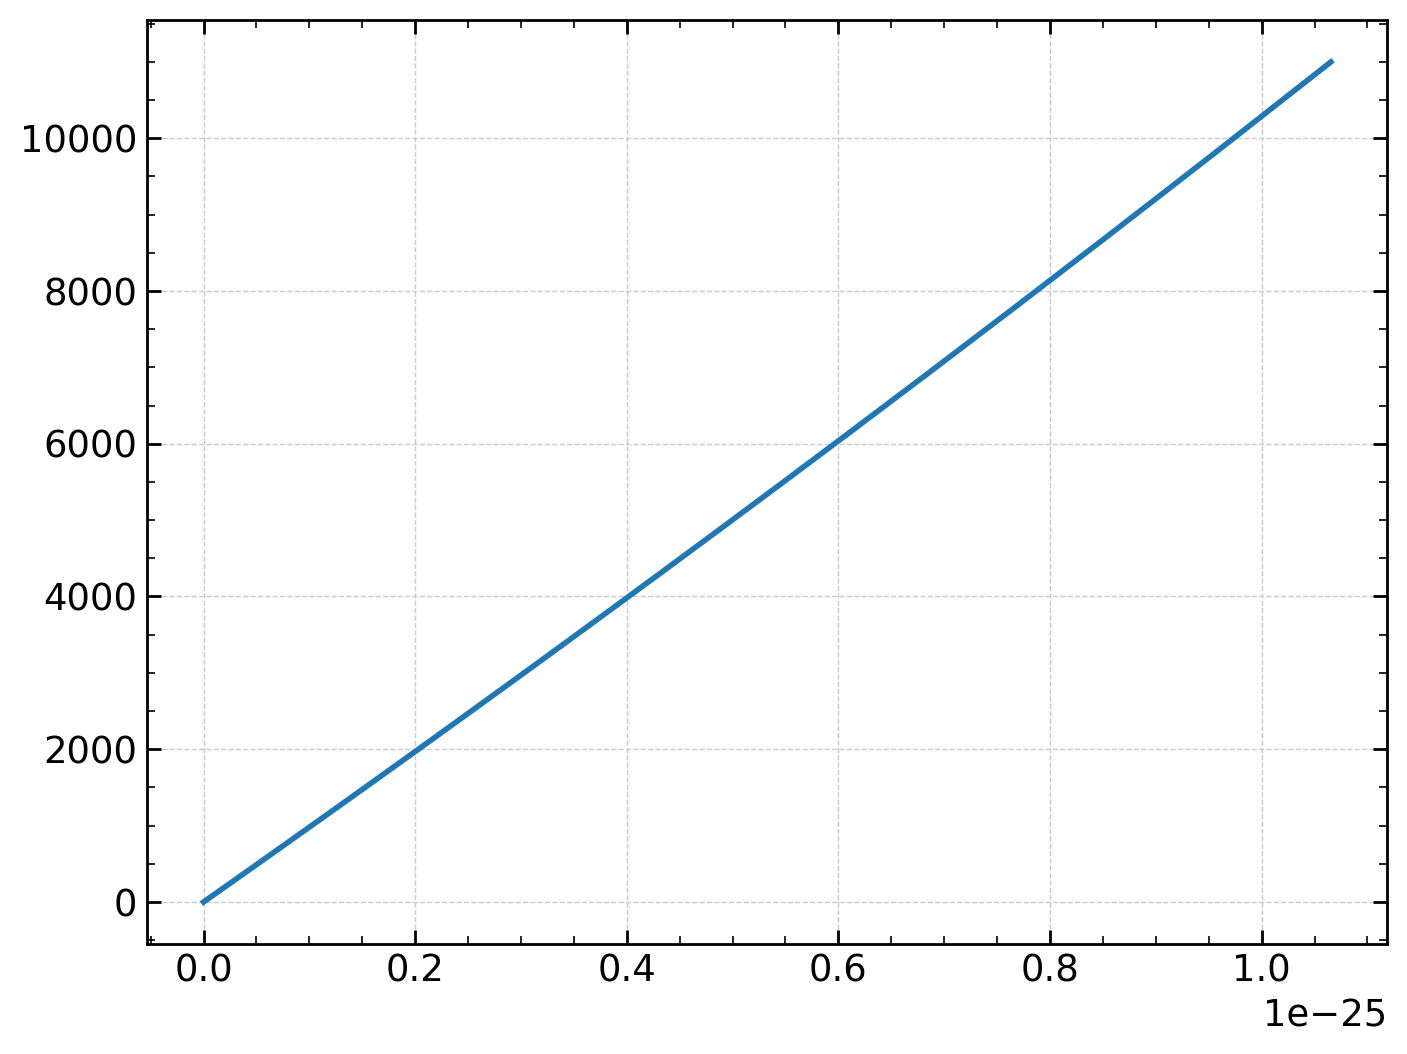